Professor Shabangu: 06 April 2021 <br/>
Palindrome data excercise   

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
start_time = datetime.datetime.now()

In [2]:
df = pd.read_excel('pone.0212445.s004.xlsx')

In [3]:
print(df.shape)

(104, 9)


In [4]:
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789


In [6]:
#summary
df.describe(include='all') 

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
count,104,104,104,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
unique,52,52,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Joe Gqabi,DC2,Fay-Heriott,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,2,52,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.113805,8.507655,16.142182,123914.230769,89210.009615,162458.317308
std,NaN,NaN,NaN,4.978586,4.635330,6.055076,115469.372356,89791.909524,145761.963447
min,NaN,NaN,NaN,1.584032,0.000000,2.998406,1876.000000,0.000000,3552.000000
25%,NaN,NaN,NaN,8.869829,4.911882,12.301325,46667.500000,28057.750000,68507.750000
50%,NaN,NaN,NaN,11.750000,8.165653,15.935119,99751.500000,69407.500000,136812.000000
75%,NaN,NaN,NaN,15.718785,11.617805,19.378361,146335.500000,115101.250000,181302.250000


In [7]:
#check nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
District          104 non-null object
Code              104 non-null object
Estimate          104 non-null object
Prevalence_%      104 non-null float64
Prevalence_LCL    104 non-null float64
Prevalence_UCL    104 non-null float64
NoPLHIV           104 non-null int64
NoPLHIV_LCL       104 non-null int64
NoPLHIV_UCL       104 non-null int64
dtypes: float64(3), int64(3), object(3)
memory usage: 7.4+ KB


In [9]:
#check uniqueness
len(df.drop_duplicates(subset=['District','Code','Estimate']))

104

# What is the total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate?

In [24]:
# Group by district and estimante then sum the total
df.groupby(['District','Estimate'])['NoPLHIV'].sum().reset_index(name ='NoPLHIV total')

,District,Estimate,NoPLHIV total
0,Alfred Nzo,Fay-Heriott,105145
1,Alfred Nzo,Survey,104363
2,Amajuba,Fay-Heriott,81010
3,Amajuba,Survey,82210
4,Amatole,Fay-Heriott,106783
...,...,...,...
99,uMzinyathi,Survey,93587
100,uThukela,Fay-Heriott,115549
101,uThukela,Survey,118124
102,uThungulu,Fay-Heriott,160285


In [25]:
df.groupby(['District','Estimate'])['NoPLHIV'].sum()

District    Estimate   
Alfred Nzo  Fay-Heriott    105145
            Survey         104363
Amajuba     Fay-Heriott     81010
            Survey          82210
Amatole     Fay-Heriott    106783
                            ...  
uMzinyathi  Survey          93587
uThukela    Fay-Heriott    115549
            Survey         118124
uThungulu   Fay-Heriott    160285
            Survey         162238
Name: NoPLHIV, Length: 104, dtype: int64

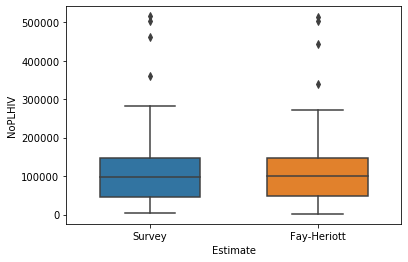

In [31]:
sns.boxplot(x="Estimate", y="NoPLHIV", data=df, width=.6)

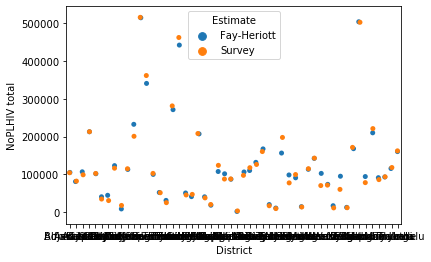

In [26]:
sns.stripplot(x="District", y="NoPLHIV total",hue="Estimate", 
              data=df.groupby(['District','Estimate'])['NoPLHIV'].sum().reset_index(name ='NoPLHIV total'))

In [21]:
#df.groupby(['District','Estimate','NoPLHIV']).agg(('NoPLHIV', sum))

# What is the average NoPLHIV of the two estimates used for “Xhariep”?

In [70]:
df[df['District']=='Xhariep']

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,HIV_negative
16,Xhariep,DC16,Survey,8.30000,6.144000,10.456000,11777,8718,14836,141891
17,Xhariep,DC16,Fay-Heriott,8.96307,7.187823,11.124214,12718,10199,15784,141893


In [34]:
df[df['District']=='Xhariep']['NoPLHIV'].mean()

12247.5

In [38]:
df[df['District']=='Xhariep'].agg('mean')

Prevalence_%          8.631535
Prevalence_LCL        6.665912
Prevalence_UCL       10.790107
NoPLHIV           12247.500000
NoPLHIV_LCL        9458.500000
NoPLHIV_UCL       15310.000000
dtype: float64

In [44]:
print("The average NoPLHIV:",(11777+12718)/2)

The average NoPLHIV: 12247.5


# Add a column and populate it with the number of people not living with HIV for each row.

In [46]:
df['HIV_negative'] = (df['NoPLHIV']/(df['Prevalence_%']/100)).astype(int)

In [47]:
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,HIV_negative
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,753213
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,753209
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3860596
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3860587
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,418592


# What is the total NoPLHIV in all the cities (districts with the word “city” or “metro” in the name)?

In [61]:
df[df['District'].str.contains("city",case=False,regex=False)]

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,HIV_negative
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,753213
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,753209
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3860596
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3860587
96,City of Johannesburg,JHB,Survey,11.100000,7.964000,14.236000,515387,369778,660996,4643126
97,City of Johannesburg,JHB,Fay-Heriott,11.075306,8.760104,13.909111,514241,406743,645818,4643131
102,City of Tshwane,TSH,Survey,11.700000,7.388000,16.012000,361450,228239,494661,3089316
103,City of Tshwane,TSH,Fay-Heriott,11.024858,8.255934,14.574909,340593,255052,450265,3089318


In [62]:
df[df['District'].str.contains("metro",case=False,regex=False)]

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,HIV_negative
100,Nelson Mandela Bay Metro,NMA,Survey,8.30000,3.400000,13.200000,97459,39923,154995,1174204
101,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.05406,6.128703,13.179704,106313,71964,154757,1174202


In [5]:
df_city = df[(df['District'].str.contains("city",case=False,regex=False)) | (df['District'].str.contains("Metro",case=False,regex=False))]

In [6]:
print(df_city.shape)

(10, 9)


In [8]:
print("total NoPLHIV in all the cities is",df_city['NoPLHIV'].sum())

total NoPLHIV in all the cities is 2572733


# Write the original data (without the caption - originally row 1) 
# with the extra columns as comma-separated values (CSV) to a new .csv file.

In [65]:
df.to_csv('new.csv')

In [69]:
end_time = datetime.datetime.now()

print("The time it took was to finish: ", end_time -start_time)

The time it took was:  1:20:43.176487
